In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Input, Embedding, LSTM, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import Model

In [3]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-11-26 06:39:06--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.31.80.48, 104.31.81.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.1s    

2020-11-26 06:39:07 (3.75 MB/s) - ‘spam.csv’ saved [503663/503663]



In [32]:
!ls

sample_data  spam.csv


In [33]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [34]:
type(df)

pandas.core.frame.DataFrame

In [35]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [36]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [37]:
df.shape

(5572, 5)

In [38]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [39]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [40]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [41]:
print(df.head(),'\n')
print(df.tail())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro... 

        v1                                                 v2
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name


In [42]:
df['v1'] = df['v1'].map({'ham':0, 'spam':1})
print(df.head(),'\n')
print(df.tail())

   v1                                                 v2
0   0  Go until jurong point, crazy.. Available only ...
1   0                      Ok lar... Joking wif u oni...
2   1  Free entry in 2 a wkly comp to win FA Cup fina...
3   0  U dun say so early hor... U c already then say...
4   0  Nah I don't think he goes to usf, he lives aro... 

      v1                                                 v2
5567   1  This is the 2nd time we have tried 2 contact u...
5568   0              Will Ì_ b going to esplanade fr home?
5569   0  Pity, * was in mood for that. So...any other s...
5570   0  The guy did some bitching but I acted like i'd...
5571   0                         Rofl. Its true to its name


In [43]:
inputs = df['v2']
labels = df['v1'].to_numpy()

In [44]:
# print(inputs.shape)
# print(labels.shape)

# (5572,)
# (5572,)

In [45]:
# print(type(inputs))
# print(type(labels))

# <class 'pandas.core.series.Series'>
# <class 'numpy.ndarray'>

In [46]:
# Train, test split

index = int(0.67*len(inputs))
X_train, y_train, X_test, y_test = inputs.iloc[:index], labels[:index], inputs.iloc[index:], labels[index:]

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

# (3733,) (3733,)
# (1839,) (1839,)

In [47]:
# print(X_train[0])
# print(X_test[3733])

# Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
# 4 tacos + 1 rajas burrito, right?

In [48]:
# print(type(X_train))
# print(type(y_train))
# print(type(X_test))
# print(type(y_test))

# <class 'pandas.core.series.Series'>
# <class 'numpy.ndarray'>
# <class 'pandas.core.series.Series'>
# <class 'numpy.ndarray'>

In [49]:
# Applying tokenizer on X_train
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer (num_words=MAX_VOCAB_SIZE)    # print(tokenizer) -> <keras_preprocessing.text.Tokenizer object at 0x7f8707314cc0>
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train)	
print(X_train.shape)
print(X_train[0])

(3733, 189)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0   53  408 3401  688  827  689   67    8 1103   84  118  307 1255
  130 2306 1104   63   59 3402  141]


In [50]:
T = X_train.shape[1]
# Applying tokenizer on X_test
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = T)
print(X_test.shape)
print(X_test[0])

(1839, 189)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0   43 3886  104  144]


In [51]:
# print(type(X_train))
# print(type(y_train))
# print(type(X_test))
# print(type(y_test))

# <class 'numpy.ndarray'>
# <class 'numpy.ndarray'>
# <class 'numpy.ndarray'>
# <class 'numpy.ndarray'>

In [52]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7254 unique tokens.


In [53]:
D = 20
M = 15
K = 1
visible = Input(shape=(T,))
x = Embedding(V+1, D)(visible)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
output = Dense(K, activation='sigmoid')(x)

model = Model(inputs=visible, outputs=output)

In [54]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 189)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 189, 20)           145100    
_________________________________________________________________
lstm_1 (LSTM)                (None, 189, 15)           2160      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 147,276
Trainable params: 147,276
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [56]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 5)

Epoch 1/5
117/117 [==============================] - 9s 81ms/step - loss: 0.4722 - accuracy: 0.8639 - val_loss: 0.3907 - val_accuracy: 0.8630
Epoch 2/5
117/117 [==============================] - 9s 75ms/step - loss: 0.3395 - accuracy: 0.8674 - val_loss: 0.2933 - val_accuracy: 0.8630
Epoch 3/5
117/117 [==============================] - 9s 78ms/step - loss: 0.2185 - accuracy: 0.8987 - val_loss: 0.1720 - val_accuracy: 0.9652
Epoch 4/5
117/117 [==============================] - 9s 77ms/step - loss: 0.1090 - accuracy: 0.9855 - val_loss: 0.0986 - val_accuracy: 0.9810
Epoch 5/5
117/117 [==============================] - 9s 78ms/step - loss: 0.0559 - accuracy: 0.9920 - val_loss: 0.0831 - val_accuracy: 0.9810


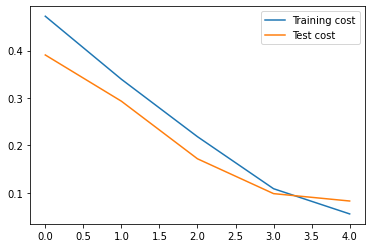

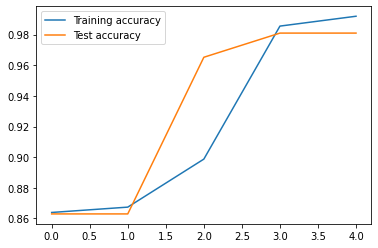

In [57]:
plt.plot(r.history['loss'], label='Training cost')
plt.plot(r.history['val_loss'], label='Test cost')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='Training accuracy')
plt.plot(r.history['val_accuracy'], label='Test accuracy')
plt.legend()
plt.show()